In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [68]:
my_df = pd.read_csv('marketing_dataset_m8.tsv', sep='\t')

In [69]:
my_df.drop(columns=['source', 'time_spent']).groupby(['watch', 'click', 'take']).count()

ID
watch click take       
1     0     0      8891
      1     0     10297
            1       814

In [70]:
my_df

,ID,time_spent,watch,click,take,source
0,0,5.578618,1,0,0,super_ad
1,1,1.224345,1,1,0,best_ad
2,2,3.809182,1,0,0,new_lead
3,3,1.585874,1,0,0,super_ad
4,4,1.418422,1,1,0,new_lead
...,...,...,...,...,...,...
19997,19997,4.528150,1,0,0,new_lead
19998,19998,4.421183,1,0,0,new_lead
19999,19999,0.048758,1,1,0,best_ad
20000,20000,0.692422,1,1,0,best_ad


In [71]:
my_df[['watch', 'click', 'take']].sum()

watch    20002
click    11111
take       814
dtype: int64

In [72]:
my_df.drop(columns=['take', 'time_spent']).groupby(['source', 'watch', 'click']).count()

ID
source   watch click      
best_ad  1     0      2917
               1      7084
new_lead 1     0      4496
               1      3023
super_ad 1     0      1478
               1      1004

In [73]:
my_df.drop(columns=['time_spent']).groupby(['source', 'watch', 'click', 'take']).count()

ID
source   watch click take      
best_ad  1     0     0     2917
               1     0     7084
new_lead 1     0     0     4496
               1     0     2424
                     1      599
super_ad 1     0     0     1478
               1     0      789
                     1      215

In [19]:
my_df[['source', 'click']].groupby('source').sum()/my_df[['click']].sum()

,click
source,
best_ad,0.637566
new_lead,0.272073
super_ad,0.090361


In [74]:
stat_df = my_df[['source', 'click', 'take']].groupby('source').sum()

In [75]:
stat_df['CR'] = stat_df['take']/stat_df['click']

In [76]:
stat_df

,click,take,CR
source,,,
best_ad,7084,0,0.000000
new_lead,3023,599,0.198148
super_ad,1004,215,0.214143


<AxesSubplot: >

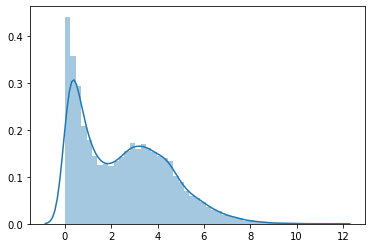

In [77]:
sns.distplot(my_df.time_spent.values)

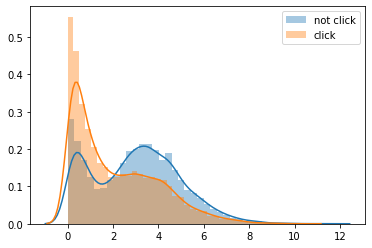

In [78]:
sns.distplot(my_df[my_df.click==0].time_spent.values)
sns.distplot(my_df[my_df.click==1].time_spent.values)
plt.legend(['not click', 'click'])

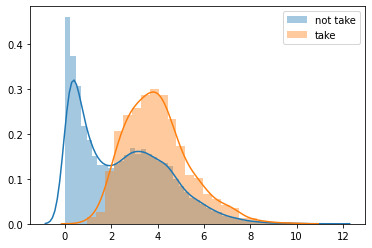

In [79]:
sns.distplot(my_df[my_df['take']==0].time_spent.values)
sns.distplot(my_df[my_df['take']==1].time_spent.values)
plt.legend(['not take', 'take'])

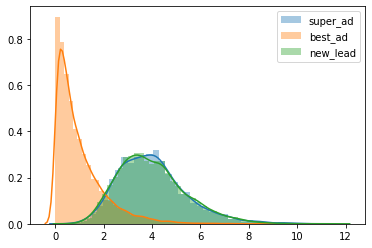

In [80]:
sns.distplot(my_df[my_df.source=='super_ad'].time_spent.values)
sns.distplot(my_df[my_df.source=='best_ad'].time_spent.values)
sns.distplot(my_df[my_df.source=='new_lead'].time_spent.values)
plt.legend(['super_ad', 'best_ad', 'new_lead'])

In [81]:
my_df_new = my_df[my_df.source!='best_ad']

In [82]:
sample = my_df_new.time_spent.values

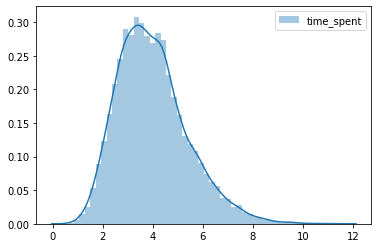

In [83]:
sns.distplot(sample)
plt.legend(['time_spent'])

In [84]:
q75, q25 = np.percentile(sample, [75, 25])

In [85]:
q95, q5 = np.percentile(sample, [95, 5])

In [88]:
print(q75, q25)

4.790011057335633 2.972924250854823


In [89]:
print(q95, q5)

6.580168152046176 2.023855812011544


In [90]:
my_df_new = my_df_new[(my_df_new.time_spent>q5)&(my_df_new.time_spent<q95)]

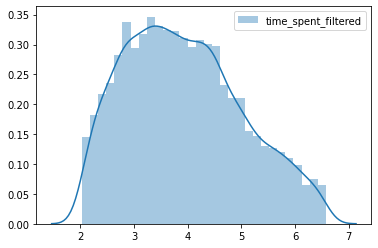

In [91]:
sns.distplot(my_df_new.time_spent.values)
plt.legend(['time_spent_filtered'])

In [92]:
my_df_new[(my_df_new.time_spent>q5)]

,ID,time_spent,watch,click,take,source
0,0,5.578618,1,0,0,super_ad
2,2,3.809182,1,0,0,new_lead
6,6,5.972807,1,0,0,new_lead
8,8,4.809006,1,0,0,super_ad
9,9,5.798559,1,1,0,new_lead
...,...,...,...,...,...,...
19992,19992,4.323026,1,1,0,new_lead
19993,19993,3.591649,1,0,0,new_lead
19996,19996,4.945409,1,1,0,new_lead
19997,19997,4.528150,1,0,0,new_lead


In [93]:
my_df_new[['ID', 'click', 'take']].groupby(['click', 'take']).count()/my_df_new.shape[0]

ID
click take          
0     0     0.597400
1     0     0.321702
      1     0.080898

In [94]:
stat_df_new = my_df_new[['source', 'click', 'take']].groupby('source').sum()

In [95]:
stat_df_new['CR'] = stat_df_new['take']/stat_df_new['click']

In [96]:
stat_df_new

,click,take,CR
source,,,
new_lead,2713,539,0.198673
super_ad,910,189,0.207692
